In [5]:
import torch

x = torch.tensor([[1, 2, 3, 4]])
y = torch.tensor([[5, 6, 7, 8]])

w = torch.tensor(1, dtype=torch.float32, requires_grad=True)
b = torch.tensor(1, dtype=torch.float32, requires_grad=True)

epochs = 1000
lr = 0.001

for epoch in range(epochs):
    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()

    if x.grad or b.grad:
        w.grad.zero_()
        b.grad.zero_()
    
    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    if epoch % 100 == 0:
        print(f'epoch: {epoch}, loss: {loss.item()}\nw: {w.item()}, b: {b.item()}')



epoch: 0, loss: 9.0
w: 1.0149999856948853, b: 1.00600004196167
epoch: 100, loss: 1.4057952165603638
w: 1.7204126119613647, b: 1.3343991041183472
epoch: 200, loss: 1.080499291419983
w: 1.8301671743392944, b: 1.4575921297073364
epoch: 300, loss: 1.0093005895614624
w: 1.8299922943115234, b: 1.5408618450164795
epoch: 400, loss: 0.950341522693634
w: 1.8100202083587646, b: 1.6149405241012573
epoch: 500, loss: 0.8950889110565186
w: 1.7869625091552734, b: 1.685584306716919
epoch: 600, loss: 0.8430578708648682
w: 1.7639027833938599, b: 1.7539117336273193
epoch: 700, loss: 0.794052004814148
w: 1.7413969039916992, b: 1.8201802968978882
epoch: 800, loss: 0.7478939890861511
w: 1.7195311784744263, b: 1.8844859600067139
epoch: 900, loss: 0.7044200301170349
w: 1.6983064413070679, b: 1.9468934535980225


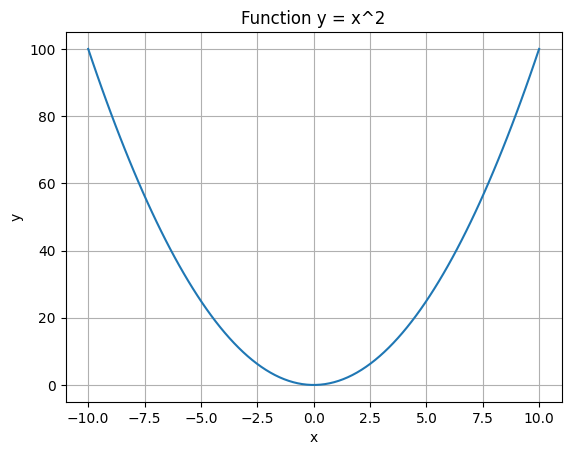

epoch: 0, x: 2.4000, y: 9.0000
epoch: 1, x: 1.9200, y: 5.7600
epoch: 2, x: 1.5360, y: 3.6864
epoch: 3, x: 1.2288, y: 2.3593
epoch: 4, x: 0.9830, y: 1.5099
epoch: 5, x: 0.7864, y: 0.9664
epoch: 6, x: 0.6291, y: 0.6185
epoch: 7, x: 0.5033, y: 0.3958
epoch: 8, x: 0.4027, y: 0.2533
epoch: 9, x: 0.3221, y: 0.1621
epoch: 10, x: 0.2577, y: 0.1038
epoch: 11, x: 0.2062, y: 0.0664
epoch: 12, x: 0.1649, y: 0.0425
epoch: 13, x: 0.1319, y: 0.0272
epoch: 14, x: 0.1056, y: 0.0174
epoch: 15, x: 0.0844, y: 0.0111
epoch: 16, x: 0.0676, y: 0.0071
epoch: 17, x: 0.0540, y: 0.0046
epoch: 18, x: 0.0432, y: 0.0029
epoch: 19, x: 0.0346, y: 0.0019
epoch: 20, x: 0.0277, y: 0.0012
epoch: 21, x: 0.0221, y: 0.0008
epoch: 22, x: 0.0177, y: 0.0005
epoch: 23, x: 0.0142, y: 0.0003
epoch: 24, x: 0.0113, y: 0.0002
epoch: 25, x: 0.0091, y: 0.0001
epoch: 26, x: 0.0073, y: 0.0001
epoch: 27, x: 0.0058, y: 0.0001
epoch: 28, x: 0.0046, y: 0.0000
epoch: 29, x: 0.0037, y: 0.0000
epoch: 30, x: 0.0030, y: 0.0000
epoch: 31, x: 0.00

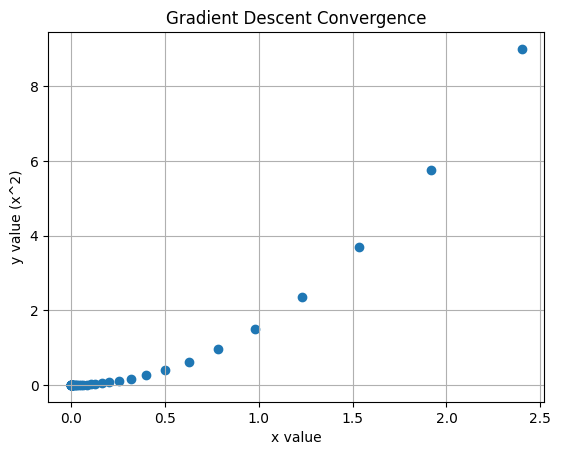

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np

def test01():
    x = np.linspace(-10, 10, 100)
    y = x ** 2
    plt.plot(x, y)
    plt.title('Function y = x^2')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

def test02():
    # 初始化自变量 X
    x = torch.tensor([3.0], requires_grad=True, dtype=torch.float)
    # 迭代轮次
    epochs = 50
    # 学习率
    lr = 0.1

    history = []  # 避免使用内置名称list
    for i in range(epochs):
        # 计算函数表达式
        y = x ** 2

        # 梯度清零
        if x.grad is not None:
            x.grad.zero_()
            
        # 反向传播
        y.backward()
        
        # 梯度下降 - 简化写法
        with torch.no_grad():
            x -= lr * x.grad  # 直接更新x，不需要使用.data

        print(f'epoch: {i}, x: {x.item():.4f}, y: {y.item():.4f}')
        history.append((x.item(), y.item()))

    # 散点图，观察收敛效果
    x_list = [l[0] for l in history]
    y_list = [l[1] for l in history]

    plt.figure()  # 创建新图形
    plt.scatter(x=x_list, y=y_list)
    plt.title('Gradient Descent Convergence')
    plt.xlabel('x value')
    plt.ylabel('y value (x^2)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    test01()
    test02()